# PREDICTING THE CAB BOOKING CANCELLATIONS

By : Srikar Kanaparthi

#### I've taken this topic from kaggle compettion page 
##### The problem goes like this : 

Introduction
The goal of this challenge is to improve customer service at YourCabs.com, a cab company in Bangalore. Some cab bookings must be cancelled by the company due to unavailability of a car (overbooking). The problem is that cancellations can occur very close to the trip start time, thereby causing inconveniences for the passengers. The task is to predict which cab bookings will most probably be cancelled, given a number of booking attributes.

Task : 
The goal of the competition is to create a predictive model for classifying new bookings (described by features such as time of booking, origin and destination of the trip, car Id) as to whether they will eventually get cancelled due to car unavailability. Participants need to upload their classifications (0=no cancellation or 1=cancellation), and the system will compute the accuracy of these classifications.

Link : https://inclass.kaggle.com/c/predicting-cab-booking-cancellations2

Refernces :http://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it,   http://mlwiki.org/index.php/ROC_Analysis
            

The datafile here we're using is " Kaggle_YourCabs_training.csv"

In [38]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

# Importing the data from the files
Cab_Can=pd.read_csv("Kaggle_YourCabs_training.csv")

In [39]:
Cab_Can.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


In [40]:
Cab_Can.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

In [41]:
### our goal is to predict the cancellation of a cab so
y = Cab_Can.pop("Car_Cancellation")

In [42]:
### Remove the unwanted data ( only dropping Cost_of_error for now)
Cab_Can.drop(["Cost_of_error"], axis=1, inplace=True)

In [43]:
## numerical variables 
numeric_variables = list(Cab_Can.dtypes[Cab_Can.dtypes != "object"].index)
Cab_Can[numeric_variables].head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long
0,132512,22177,28,NaN,2,83,448,NaN,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750
1,132513,21413,12,NaN,2,1010,540,NaN,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640
2,132514,22178,12,NaN,2,1301,1034,NaN,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766
3,132515,13034,12,NaN,2,768,398,NaN,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140
4,132517,22180,12,NaN,2,1365,849,NaN,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720


In [44]:
# missing values should be replaced with the zero
missing_Values=['package_id',
                'from_area_id',
                'to_area_id',
                'from_city_id',
                'to_city_id',
                'to_date',
                'from_lat',
                'from_long',
                'to_lat',
                'to_long']
for i in range(0, 10, 1):
    Cab_Can[missing_Values[i]].fillna(0, inplace=True)

In [45]:
Cab_Can.head(10)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,132512,22177,28,0,2,83,448,0,0,1/1/2013 2:00,0.00000,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,132513,21413,12,0,2,1010,540,0,0,1/1/2013 9:00,0.00000,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,132514,22178,12,0,2,1301,1034,0,0,1/1/2013 3:30,0.00000,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,132515,13034,12,0,2,768,398,0,0,1/1/2013 5:45,0.00000,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,132517,22180,12,0,2,1365,849,0,0,1/1/2013 9:00,0.00000,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720
5,132518,17712,12,0,2,1021,1323,0,0,1/1/2013 22:30,0.00000,0,0,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211
6,132519,22172,12,0,1,571,0,15,108,1/1/2013 9:45,41275.40625,0,0,1/1/2013 9:21,12.951850,77.696420,0.000000,0.000000
7,132520,22181,12,0,2,1192,832,0,0,1/1/2013 11:00,0.00000,0,0,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580
8,132521,22182,65,2,3,448,0,0,0,1/1/2013 16:00,0.00000,0,0,1/1/2013 9:44,12.927320,77.635750,0.000000,0.000000
9,132522,22184,12,0,2,516,376,0,0,1/1/2013 11:00,0.00000,0,0,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810


###  MODEL CREATION 

In [46]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(Cab_Can[numeric_variables], y, test_size=.2)

In [47]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

roc = roc_auc_score(y_test, model.predict(X_test))
print "AUC: ", roc

AUC:  0.617062000612


###  MODEL 2

In [48]:
### Categorical variables
def C_V (Cab_Can):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    C_V(Cab_Can)

In [49]:
##  here we need to lookup at the from date and the booking created
import datetime
RemainingDays=[]
for i in range(0, Cab_Can.shape[0], 1):
    from_date=datetime.datetime.strptime(Cab_Can.from_date.get_value(i), '%m/%d/%Y %H:%M')
    booking_date=datetime.datetime.strptime(Cab_Can.booking_created.get_value(i), '%m/%d/%Y %H:%M')
    difference=from_date-booking_date
    RemainingDays.append(difference.days)

In [50]:
###Assigining the remaining days to the Cab_Can
Cab_Can['RemainingDays']= RemainingDays

In [51]:
## Splitting the date and time variables
import time
def handle_date(x):
    '''takes date as input
    splits the date variable as day, month, year, hours 
    returns day, month and hour'''
    
    seconds= int(time.mktime(time.strptime(x, '%m/%d/%Y %H:%M'))) - time.timezone
    timeStamp=time.strftime("%a,%d %b %Y %H:%M:%S", time.gmtime(seconds))
    day, date=timeStamp.split(',')
    dd, mmm, yyyy, T= date.split(' ')
    hour, minut, sec = T.split(":")
    return day, mmm, hour

### def create_month(x):
### return x.split('/')[0]
### def create_hours(x):
### return x.split('/')[1]
### def create_year(x):
### return x.split('/')[2]

def split_date_col(date_col):
    '''takes each date column from data set 'X'
    calls "handle_date()" fn
    returns list of months, days and hours for corresponding date column'''
    
    months=[]
    days=[]
    hours=[]
    for i in range(0, Cab_Can.shape[0], 1):
        d, m, s= handle_date(date_col.get_value(i))
        months.append(m)
        days.append(d)
        hours.append(s)
    return months, days, hours

In [52]:
#Split 'date to columns(month, day, time)
from_month, from_weekday, from_time= split_date_col(Cab_Can.from_date)
booking_month, booking_weekday, booking_time=split_date_col(Cab_Can.booking_created)

### Cab_Can['Day_of_Journey'] = Cab_Can.from_date.apply(create_day)
### Cab_Can['Month_of_Journey'] = Cab_Can.from_date.apply(create_month)
### Cab_Can['YearTemp_of_Journey'] = Cab_Can.from_date.apply(create_year)

In [53]:
### newly created columns from from_date
Cab_Can['from_month']=from_month
Cab_Can['from_weekday']=from_weekday
Cab_Can['from_time']=from_time

### newly created columns from booking_created
Cab_Can['booking_month']=booking_month
Cab_Can['booking_weekday']=booking_weekday
Cab_Can['booking_time']=booking_time


In [54]:
Cab_Can.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,from_long,to_lat,to_long,RemainingDays,from_month,from_weekday,from_time,booking_month,booking_weekday,booking_time
0,132512,22177,28,0,2,83,448,0,0,1/1/2013 2:00,...,77.672290,12.927320,77.635750,0,Jan,Tue,02,Jan,Tue,01
1,132513,21413,12,0,2,1010,540,0,0,1/1/2013 9:00,...,77.749350,12.927680,77.626640,0,Jan,Tue,09,Jan,Tue,02
2,132514,22178,12,0,2,1301,1034,0,0,1/1/2013 3:30,...,77.626915,13.047926,77.597766,0,Jan,Tue,03,Jan,Tue,03
3,132515,13034,12,0,2,768,398,0,0,1/1/2013 5:45,...,77.553320,12.971430,77.639140,0,Jan,Tue,05,Jan,Tue,04
4,132517,22180,12,0,2,1365,849,0,0,1/1/2013 9:00,...,77.677925,12.954340,77.600720,0,Jan,Tue,09,Jan,Tue,07


In [55]:
### now dropping the from_date and booking_ created as now they're of no use
Cab_Can.drop(["from_date"], axis=1, inplace=True)
Cab_Can.drop(["booking_created"], axis=1, inplace=True)

### now dropping the unnecessary data
Cab_Can.drop(["to_date"], axis=1, inplace=True)
Cab_Can.drop(["id"], axis=1, inplace=True)
Cab_Can.drop(["user_id"], axis=1, inplace=True)

In [56]:
Cab_Can.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,RemainingDays,from_month,from_weekday,from_time,booking_month,booking_weekday,booking_time
0,28,0,2,83,448,0,0,0,0,12.924150,77.672290,12.927320,77.635750,0,Jan,Tue,02,Jan,Tue,01
1,12,0,2,1010,540,0,0,0,0,12.966910,77.749350,12.927680,77.626640,0,Jan,Tue,09,Jan,Tue,02
2,12,0,2,1301,1034,0,0,0,0,12.937222,77.626915,13.047926,77.597766,0,Jan,Tue,03,Jan,Tue,03
3,12,0,2,768,398,0,0,0,0,12.989990,77.553320,12.971430,77.639140,0,Jan,Tue,05,Jan,Tue,04
4,12,0,2,1365,849,0,0,0,0,12.845653,77.677925,12.954340,77.600720,0,Jan,Tue,09,Jan,Tue,07


In [57]:
### reducing the categorical variables
C_V =         [  'vehicle_model_id',
                'package_id', 
                'travel_type_id', 
                'from_city_id', 
                'online_booking', 
                'mobile_site_booking', 
                'to_city_id',
                'from_month', 
                'from_weekday', 
                'booking_month', 
                'booking_weekday', ]

for a in C_V:
    dummies = pd.get_dummies(Cab_Can[a], prefix=a)
    Cab_Can = pd.concat([Cab_Can, dummies], axis=1)
    Cab_Can.drop([a], axis=1, inplace=True)

In [58]:
# Look at all the columns in the dataset
def printall(Cab_Can, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(Cab_Can.to_html(max_rows=max_rows)))
    
printall(Cab_Can)

,from_area_id,to_area_id,from_lat,from_long,to_lat,to_long,RemainingDays,from_time,booking_time,vehicle_model_id_1,vehicle_model_id_10,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_76,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,package_id_0.0,package_id_1.0,package_id_2.0,package_id_3.0,package_id_4.0,package_id_5.0,package_id_6.0,package_id_7.0,travel_type_id_1,travel_type_id_2,travel_type_id_3,from_city_id_0.0,from_city_id_1.0,from_city_id_15.0,from_city_id_31.0,online_booking_0,online_booking_1,mobile_site_booking_0,mobile_site_booking_1,to_city_id_0.0,to_city_id_4.0,to_city_id_5.0,to_city_id_8.0,to_city_id_10.0,to_city_id_11.0,to_city_id_12.0,to_city_id_13.0,to_city_id_14.0,to_city_id_16.0,to_city_id_17.0,to_city_id_18.0,to_city_id_20.0,to_city_id_23.0,to_city_id_24.0,to_city_id_25.0,to_city_id_28.0,to_city_id_29.0,to_city_id_30.0,to_city_id_31.0,to_city_id_32.0,to_city_id_36.0,to_city_id_37.0,to_city_id_41.0,to_city_id_42.0,to_city_id_44.0,to_city_id_45.0,to_city_id_48.0,to_city_id_49.0,to_city_id_50.0,to_city_id_51.0,to_city_id_52.0,to_city_id_53.0,to_city_id_55.0,to_city_id_56.0,to_city_id_57.0,to_city_id_58.0,to_city_id_60.0,to_city_id_61.0,to_city_id_62.0,to_city_id_64.0,to_city_id_65.0,to_city_id_66.0,to_city_id_67.0,to_city_id_68.0,to_city_id_69.0,to_city_id_72.0,to_city_id_75.0,to_city_id_76.0,to_city_id_77.0,to_city_id_80.0,to_city_id_82.0,to_city_id_85.0,to_city_id_88.0,to_city_id_89.0,to_city_id_94.0,to_city_id_97.0,to_city_id_108.0,to_city_id_109.0,to_city_id_110.0,to_city_id_111.0,to_city_id_113.0,to_city_id_114.0,to_city_id_115.0,to_city_id_116.0,to_city_id_119.0,to_city_id_120.0,to_city_id_121.0,to_city_id_125.0,to_city_id_126.0,to_city_id_131.0,to_city_id_132.0,to_city_id_133.0,to_city_id_134.0,to_city_id_135.0,to_city_id_137.0,to_city_id_139.0,to_city_id_142.0,to_city_id_144.0,to_city_id_146.0,to_city_id_147.0,to_city_id_148.0,to_city_id_149.0,to_city_id_151.0,to_city_id_152.0,to_city_id_154.0,to_city_id_157.0,to_city_id_160.0,to_city_id_161.0,to_city_id_162.0,to_city_id_163.0,to_city_id_164.0,to_city_id_165.0,to_city_id_166.0,to_city_id_167.0,to_city_id_168.0,to_city_id_169.0,to_city_id_170.0,to_city_id_172.0,to_city_id_173.0,to_city_id_176.0,to_city_id_178.0,to_city_id_179.0,to_city_id_182.0,to_city_id_184.0,to_city_id_185.0,to_city_id_186.0,to_city_id_187.0,to_city_id_189.0,to_city_id_190.0,to_city_id_191.0,to_city_id_192.0,to_city_id_196.0,to_city_id_197.0,to_city_id_198.0,to_city_id_200.0,to_city_id_203.0,from_month_Apr,from_month_Aug,from_month_Dec,from_month_Feb,from_month_Jan,from_month_Jul,from_month_Jun,from_month_Mar,from_month_May,from_month_Nov,from_month_Oct,from_month_Sep,from_weekday_Fri,from_weekday_Mon,from_weekday_Sat,from_weekday_Sun,from_weekday_Thu,from_weekday_Tue,from_weekday_Wed,booking_month_Apr,booking_month_Aug,booking_month_Feb,booking_month_Jan,booking_month_Jul,booking_month_Jun,booking_month_Mar,booking_month_May,booking_month_Nov,booking_month_Oct,booking_month_Sep,booking_weekday_Fri,booking_weekday_Mon,booking_weekday_Sat,booking_weekday_Sun,booking_weekday_Thu,booking_weekday_Tue,booking_weekday_Wed
0,83,448,12.924150,77.672290,12.927320,77.635750,0,02,01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1010,540,12.966910,77.

In [59]:
from sklearn.cross_validation import train_test_split
import numpy as np

In [60]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(Cab_Can, y, test_size=.2)

In [61]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

roc = roc_auc_score(y_test, model.predict(X_test))
print "AUC: ", roc

AUC:  0.60496170732


AUC score is 0.6049. Since it's a very poor model

### Parameters to test to achieve better model are
#### n_estimators: The number of trees in the forest.
#### max_features: The number of features to consider when looking for the best split.
#### min_samples_leaf: The minimum number of samples in newly created leaves.
##### n_jobs: Determines if multiple processors should be used to train and test the model.

In [62]:
from sklearn.grid_search import GridSearchCV
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)


In [63]:
## Fit Model
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [64]:
## Best Model
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
best_rfc = estimator.best_estimator_

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
## Calculating Accuracy
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.938298607114


In [68]:
## Calculating Precision and Recall
from sklearn.metrics import classification_report
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97      8073
          1       0.74      0.19      0.31       614

avg / total       0.93      0.94      0.92      8687



In [69]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[8032   41]
 [ 495  119]]


In [70]:
#AUC
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.89927043981


In [73]:
from sklearn.metrics import roc_curve
import math
import matplotlib.pyplot as plt

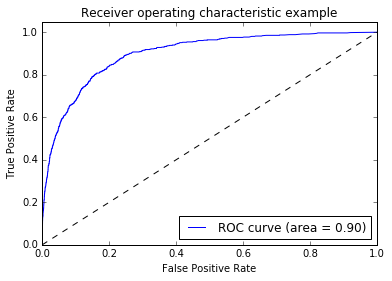

In [74]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### K-Fold Cross Validation
Split the data into K chunks
Train K models, retain a chunk for testing and use the other K-1 chunks for training.
The result is K scores, which can be combined into a single average score for the model

In [75]:
from sklearn import cross_validation

In [77]:
scores = cross_validation.cross_val_score(best_rfc, Cab_Can, y, cv=10)
scores

array([ 0.92771639,  0.90953039,  0.25926779,  0.72277228,  0.8802671 ,
        0.91733825,  0.90904904,  0.8885563 ,  0.85516924,  0.39336711])

In [78]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print 'There is a 94 percent probability that the average score would be between %f and %f if we repeat over and over' % (lower_bound, upper_bound)

Score is 0.766303 +/-  0.163686
There is a 94 percent probability that the average score would be between 0.602617 and 0.929990 if we repeat over and over


K:\Anaconda IF\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


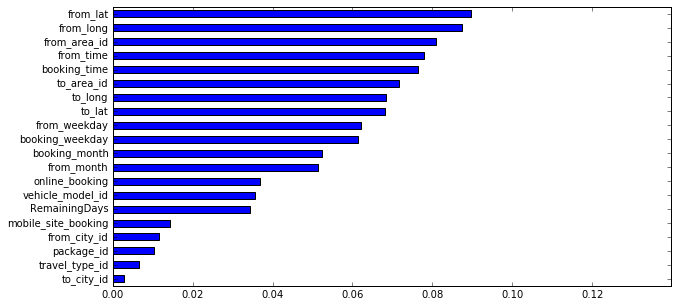

In [80]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = best_rfc.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, best_rfc.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(best_rfc, Cab_Can.columns, summarized_columns=C_V)

# The Results

## Precision and Recall
Precision is ratio of true positives to all positives.
Recall is the fraction of observations classified in that class that was correctly classified.
Where high precision relates to a 'low false positive rate', and high recall relates to a 'low false negative rate'.
High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

#### The model has 93% of perfection in identigying  cab cancellation and a 7% chance it will show false report. (tp / tp+fp)
#### From this 94% of the cabs will  cancelled.Final model has 6% of the times that it cant identify a cancelled booking currently . (tp / tp + fn)

## Confusion Matrix

#### tp=8032
#### fp=41
#### fn=495

### Results due to error:

#### fnx100=>495x100=49500 units
#### fpx1=>41x1=40units

### AUC Score
#### Auc Score is : 0.89927043981 ( This model approximately 90% correctly predicts the cab cancellation )

### Performance of the Model 

#### AUC score was 0.899. But, after K-Fold Cross Validation it is clear that our model was overfitting.
#### AUC of the final model would be between 0.602617 and 0.929990.
#### Average K-Fold CV  Score is 0.766303
